# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline


In [2]:
# Your code here
ds = pd.read_csv('../data/boston_data.csv')

In [3]:
ds.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [4]:
# Your plots here

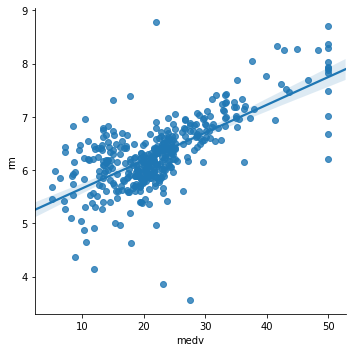

In [5]:
sns.lmplot(x='medv',y='rm',data=ds,fit_reg=True)

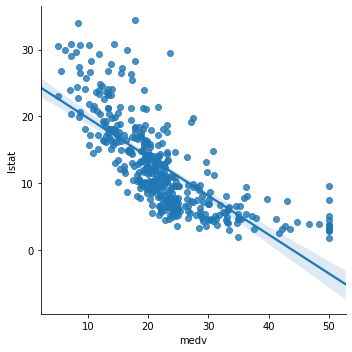

In [6]:
sns.lmplot(x='medv',y='lstat',data=ds,fit_reg=True)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [7]:
# Your response here
'''There is a positive correlation between medv and lstat. There is a negative correlation 
between medv and rm. Yes, according to the heatmap this is what I expected.'''

'There is a positive correlation between medv and lstat. There is a negative correlation \nbetween medv and rm. Yes, according to the heatmap this is what I expected.'

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

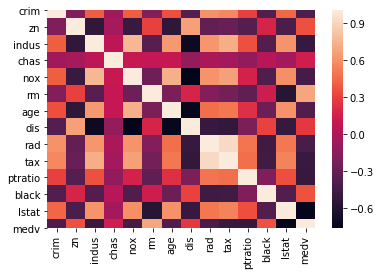

In [8]:
# Your response here
sns.heatmap(ds.corr())

In [9]:
'''black and dis also have correlations around 0.4 that I didn not consider as this correlations
do not seem to be that high.'''

'black and dis also have correlations around 0.4 that I didn not consider as this correlations\ndo not seem to be that high.'

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [10]:
# Your code here
ds['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [11]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [12]:
X = ds.drop(['medv'], axis = 1)
y = ds['medv']

In [13]:
# Your code here
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state = 29)

In [15]:
# checking shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(303, 13)
(101, 13)
(303,)
(101,)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

In [18]:
from sklearn.ensemble import RandomForestRegressor

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [27]:
# First separate RFR here with the given max depths
d = [2,4,6,8,10]

for depth in d:
    rf = RandomForestRegressor(max_depth = depth, random_state = 31)
    rf.fit(X_train, y_train);
    y_pred = rf.predict(X_test)
    errors = abs(y_pred - y_test)
    print('Mean Absolute Error for a max depth param of',depth,'=', round(np.mean(errors), 2), 'degrees.')
    mape = errors / y_test
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')



Mean Absolute Error for a max depth param of 2 = 3.28 degrees.
Accuracy: 99.85 %.
Mean Absolute Error for a max depth param of 4 = 2.8 degrees.
Accuracy: 99.87 %.
Mean Absolute Error for a max depth param of 6 = 2.62 degrees.
Accuracy: 99.88 %.
Mean Absolute Error for a max depth param of 8 = 2.54 degrees.
Accuracy: 99.89 %.
Mean Absolute Error for a max depth param of 10 = 2.44 degrees.
Accuracy: 99.89 %.


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

Now, plot the score for each tree on the training set and on the testing set.

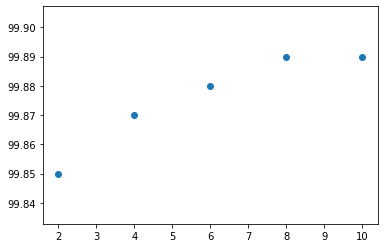

In [29]:
y = [99.85,99.87,99.88,99.89,99.89]
x = d
plt.scatter(x,y)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# The more the depth the more accurate is the model.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [19]:
# Your response here
# I guess high variance. when depth is 10, high bias

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [34]:
# Your response here
d = [2,6,10,16,20,21,22,26,30]

for depth in d:
    rf = RandomForestRegressor(max_depth = depth, random_state = 31)
    rf.fit(X_train, y_train);
    y_pred = rf.predict(X_test)
    errors = abs(y_pred - y_test)
    print('Mean Absolute Error for a max depth param of',depth,'=', round(np.mean(errors), 2), 'degrees.')
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/si

Mean Absolute Error for a max depth param of 2 = 3.28 degrees.
Accuracy: 84.87 %.
Mean Absolute Error for a max depth param of 6 = 2.62 degrees.
Accuracy: 88.11 %.
Mean Absolute Error for a max depth param of 10 = 2.44 degrees.
Accuracy: 88.96 %.
Mean Absolute Error for a max depth param of 16 = 2.48 degrees.
Accuracy: 88.83 %.
Mean Absolute Error for a max depth param of 20 = 2.5 degrees.
Accuracy: 88.7 %.
Mean Absolute Error for a max depth param of 21 = 2.5 degrees.
Accuracy: 88.7 %.
Mean Absolute Error for a max depth param of 22 = 2.5 degrees.
Accuracy: 88.7 %.
Mean Absolute Error for a max depth param of 26 = 2.5 degrees.
Accuracy: 88.7 %.
Mean Absolute Error for a max depth param of 30 = 2.5 degrees.
Accuracy: 88.7 %.


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
'''
House price change a lot from time to time, so I would not consider this data relevant.
It seems that other important features are missing, such as number of bedrooms and house square feet.
An accuracy around 88% does not provide a consistent model.
No. The data referred to urban house price could not be used in rural areas as the factors 
affeting price could be different, not to mention that generally, prices should be lower. 
'''